# <center>**Analisi Dataset**</center>


## Cosa andremo a fare?

# Introduzione

Durante questo compito, ci occuperemo della revisione e modifica del dataset relativo alle malattie cardiache (Heart Disease). Lo scopo principale di questo lavoro è preparare il dataset per l'analisi e l'interpretazione, assicurando che rispetti gli standard di qualità e integrità dei dati.

La revisione e la modifica del dataset sono fasi cruciali in qualsiasi analisi dati, in quanto assicurano che i dati siano accurati, completi e coerenti. Nel contesto delle malattie cardiache, è fondamentale che i dati siano correttamente raccolti e preparati per supportare la ricerca e l'analisi accurate delle condizioni cardiache.

Durante questo processo, affronteremo diverse sfide e compiti, inclusi:

- **Analisi esplorativa dei dati**: Esploreremo il dataset per comprendere la sua struttura, le variabili presenti e la distribuzione dei dati.
  
- **Gestione dei valori mancanti**: Identificheremo e gestiremo i valori mancanti nel dataset, utilizzando metodi come l'imputazione dei dati o la rimozione delle righe con dati mancanti.
  
- **Gestione degli outlier**: Identificheremo e gestiremo gli outlier nel dataset, utilizzando tecniche come la rimozione degli outlier o la trasformazione dei dati.
  
- **Encoding delle variabili categoriche**: Codificheremo le variabili categoriche utilizzando la codifica one-hot o altre tecniche, se necessario.

- **Splitting del dataset**: Dividiremo il dataset in set di addestramento e di test per poter valutare l'efficacia dei modelli predittivi.

### Importare il DataSet e visionare alcune righe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/Messoanuovo.it/Desktop/kaggle/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


### Esplorazione dei dati

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

### Individuazione delle colonne presenti

In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### Calcolo matrice di correlazione

In [7]:
df_corr = df.corr()
df_corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


### Visualizzazione della matrcice di correlazione tramite grafico

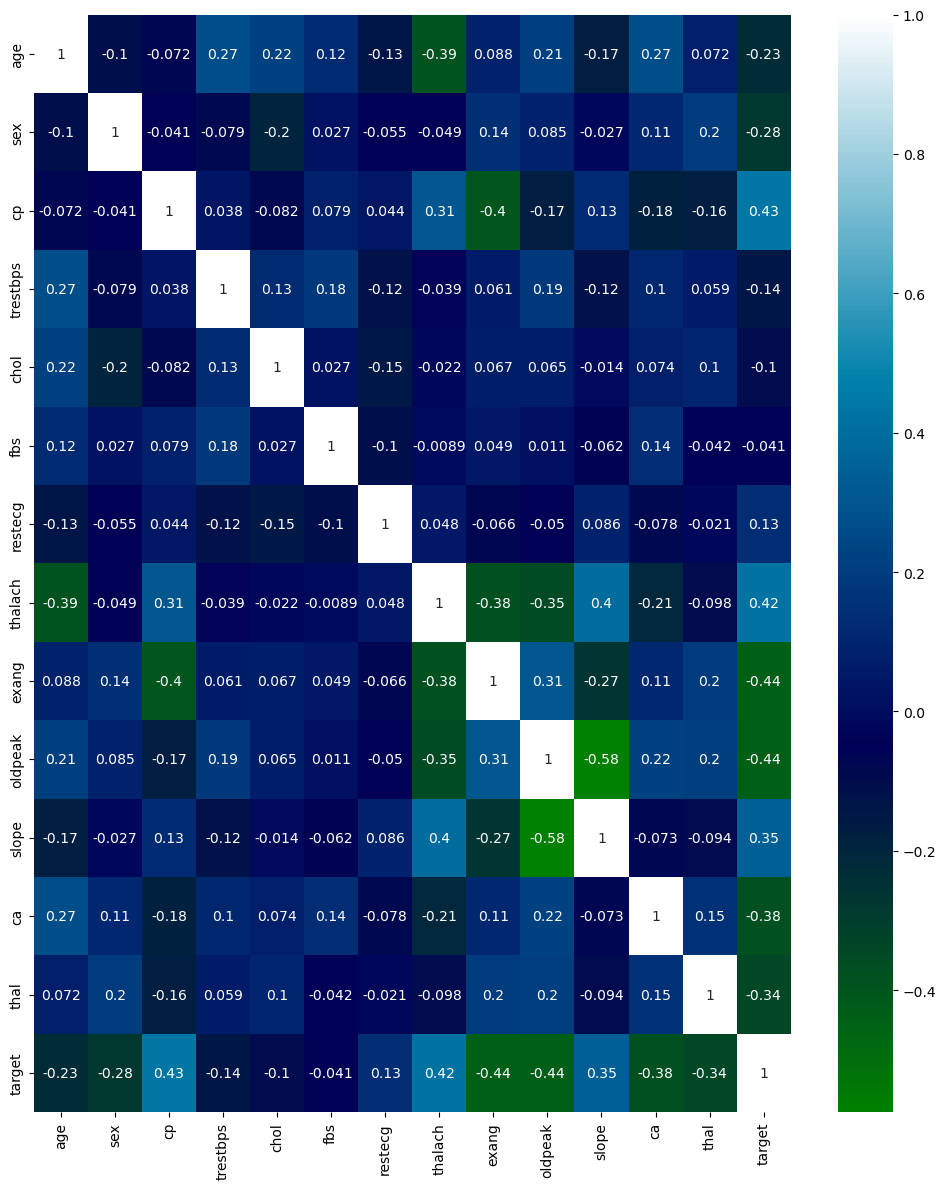

In [8]:
plt.figure(figsize=(10, 12))
sns.heatmap(df_corr, annot=True, cmap='ocean')
plt.tight_layout()
plt.show()

### Distribuzione delle varia età presenti nel dataset

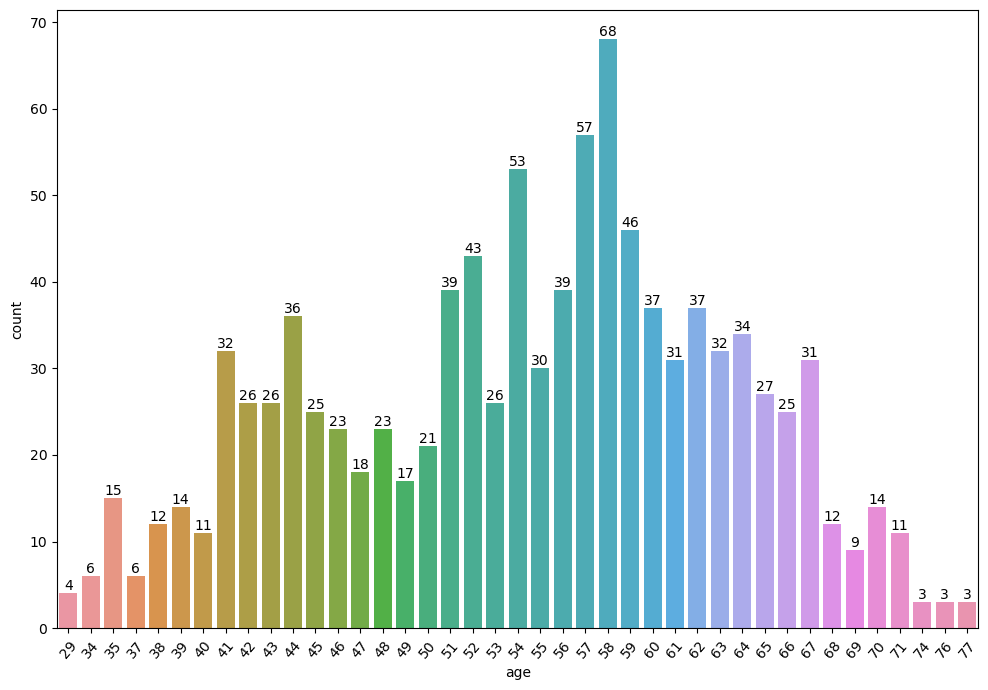

In [9]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
plt.xticks(rotation=50)
bar = sns.countplot(data=df, x='age')
for c in bar.containers:
    bar.bar_label(c, label_type='edge')
plt.tight_layout()
plt.show()

### Distribuzione del sesso

In [10]:
df.sex.value_counts()

sex
1    713
0    312
Name: count, dtype: int64

### Visualizzazione tramite grafico

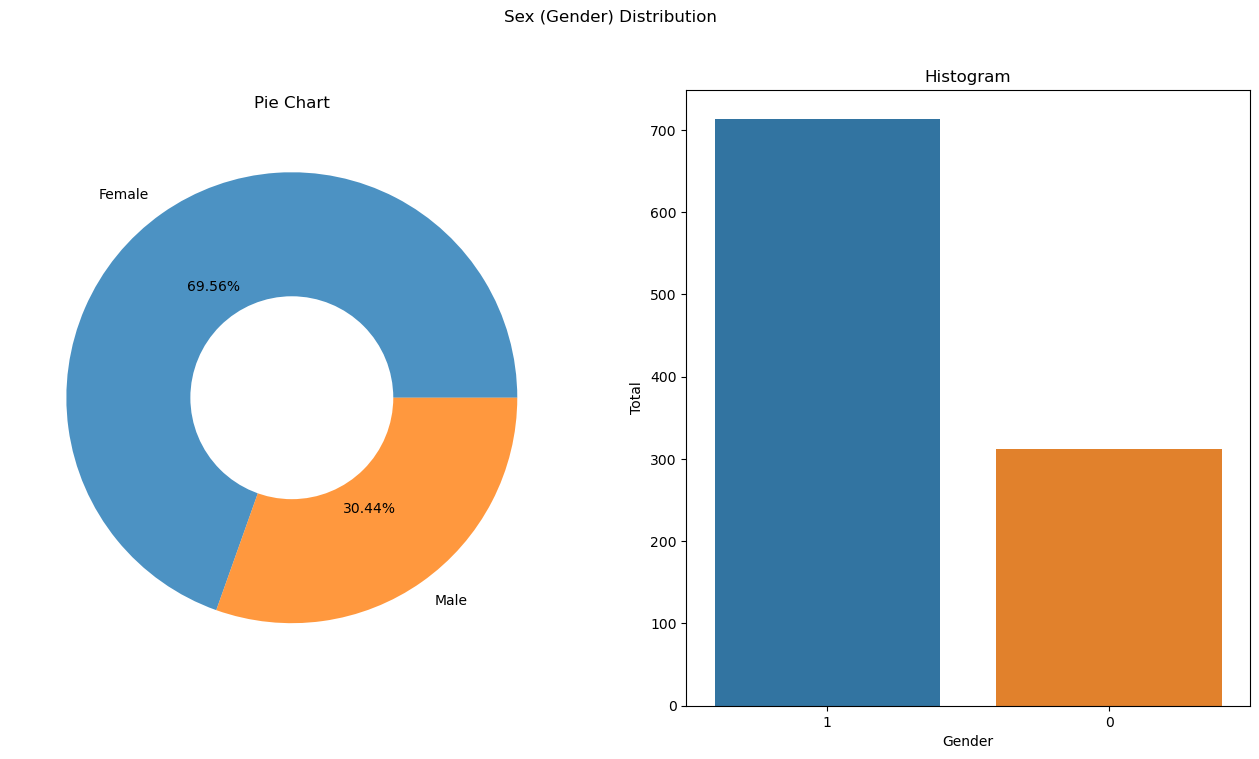

In [11]:
labels = ['Female', 'Male']
order = df['sex'].value_counts().index

# Size for Both Figures
plt.figure(figsize=(16, 8))
plt.suptitle('Sex (Gender) Distribution')

# Subplot 1 Pie Chart
plt.subplot(1, 2, 1)
plt.title('Pie Chart')
plt.pie(df['sex'].value_counts(), labels=labels, autopct='%.2f%%', wedgeprops=dict(alpha=0.8))
centre = plt.Circle((0, 0), 0.45, fc='white')
plt.gca().add_artist(centre)

# Subplot 2 Histogram
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram')
ax = sns.countplot(x='sex', data=df, order=order)
plt.xlabel('Gender')
plt.ylabel('Total')

# Mostrare la figura
plt.show()

### Visualizzazione grafici della distribuzione dei vari tipi di dolore al petto

Questo codice crea un grafico che visualizza la distribuzione del tipo di dolore toracico all'interno di un dataset. Il grafico è composto da due parti: un grafico a torta e un istogramma. Nel grafico a torta, ogni fetta rappresenta una categoria di tipo di dolore toracico, con l'etichetta corrispondente e la percentuale di osservazioni rappresentate da quella categoria. Nel grafico a istogramma, le barre rappresentano il conteggio totale di osservazioni per ciascuna categoria di tipo di dolore toracico. I colori distintivi e la disposizione ordinata delle categorie aggiungono chiarezza e facilità di interpretazione al grafico.

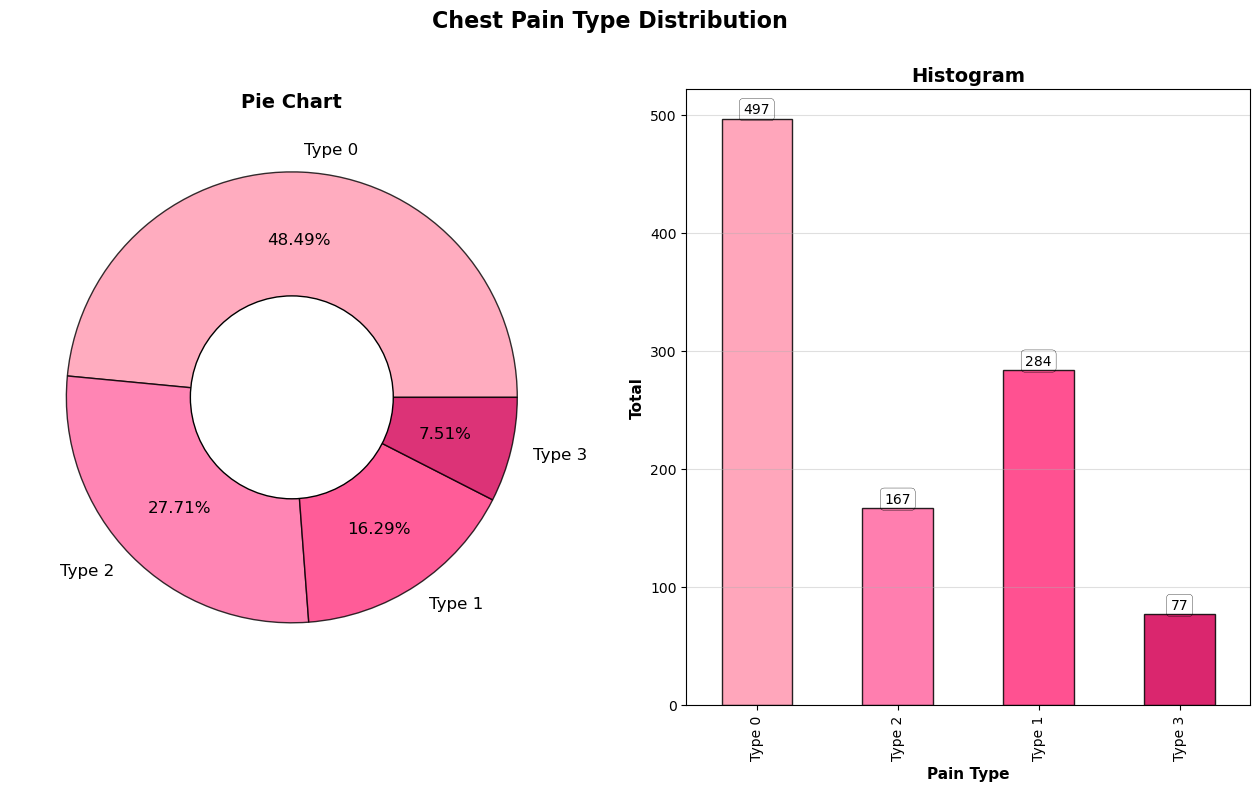

In [12]:
colors = ['#FF97AF', '#FF67A1', '#FF337E', '#D40055']
labels = ['Type 0', 'Type 2', 'Type 1', 'Type 3']
order = df['cp'].value_counts().index

# Set figure size
plt.figure(figsize=(16, 8))
plt.suptitle('Chest Pain Type Distribution', fontweight='heavy', fontsize=16, fontfamily='sans-serif', color='black')

# Pie Chart
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif', color='black')
plt.pie(df['cp'].value_counts(), labels=labels, colors=colors, pctdistance=0.7, autopct='%.2f%%', textprops={'fontsize':12},
        wedgeprops=dict(alpha=0.8, edgecolor='black'))
centre = plt.Circle((0, 0), 0.45, fc='white', edgecolor='black')
plt.gcf().gca().add_artist(centre)

# Histogram
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', color='black')
ax = df['cp'].value_counts().sort_index().plot(kind='bar', color=colors, alpha=0.85, edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+4.25, rect.get_height(),
            ha='center', fontsize=10, bbox=dict(facecolor='none', edgecolor='black', linewidth=0.25, boxstyle='round'))

plt.xlabel('Pain Type', fontweight='bold', fontsize=11, fontfamily='sans-serif', color='black')
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', color='black')
plt.xticks([0, 1, 2, 3], labels)
plt.grid(axis='y', alpha=0.4)

plt.show()

### Visualizzazione garfico relativo alla pressione sanguigna a riposo

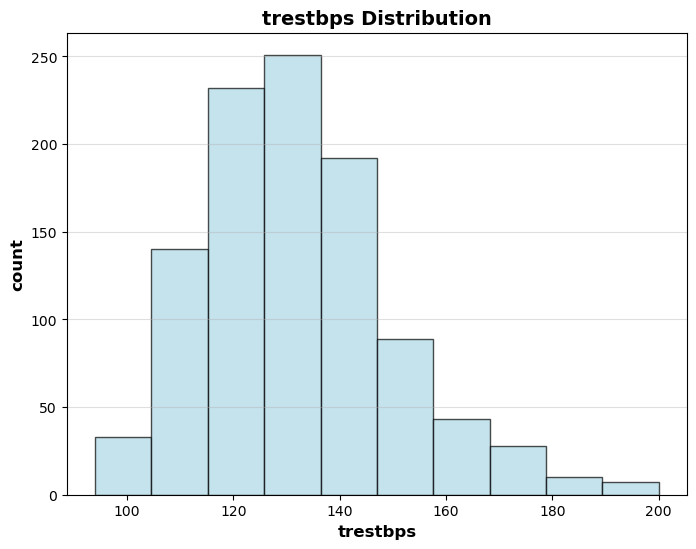

In [13]:
plt.figure(figsize=(8, 6))
plt.title('trestbps Distribution', fontweight='bold', fontsize=14)
plt.hist(df['trestbps'], bins=10, color='lightblue', edgecolor='black', alpha=0.7)
plt.xlabel('trestbps', fontweight='bold', fontsize=12)
plt.ylabel('count', fontweight='bold', fontsize=12)
plt.grid(axis='y', alpha=0.4)

plt.show()

### Visualizzazione grafico relativo al colesterolo

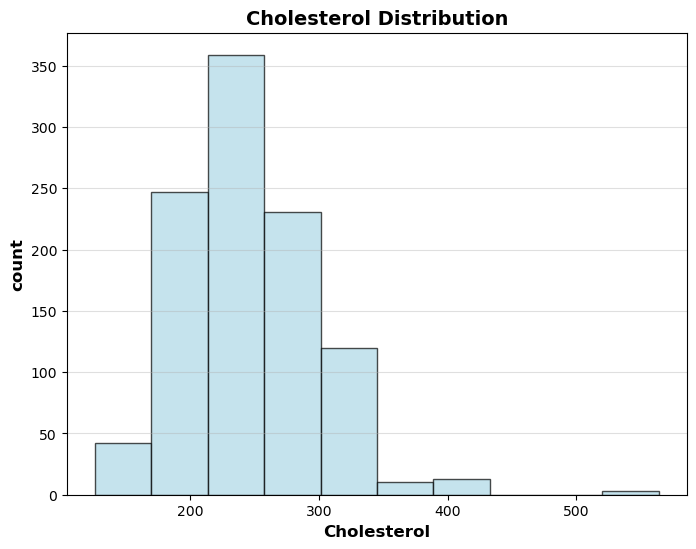

In [14]:
plt.figure(figsize=(8, 6))
plt.title('Cholesterol Distribution', fontweight='bold', fontsize=14)
plt.hist(df['chol'], bins=10, color='lightblue', edgecolor='black', alpha=0.7)
plt.xlabel('Cholesterol', fontweight='bold', fontsize=12)
plt.ylabel('count', fontweight='bold', fontsize=12)
plt.grid(axis='y', alpha=0.4)

plt.show()


### Visualizzazione grafioc relativo alla distribuzione dei livelli di zucchero nel sangue a digiuno

<Axes: title={'center': 'Histogram'}, xlabel='Fasting Blood Sugar', ylabel='Total'>

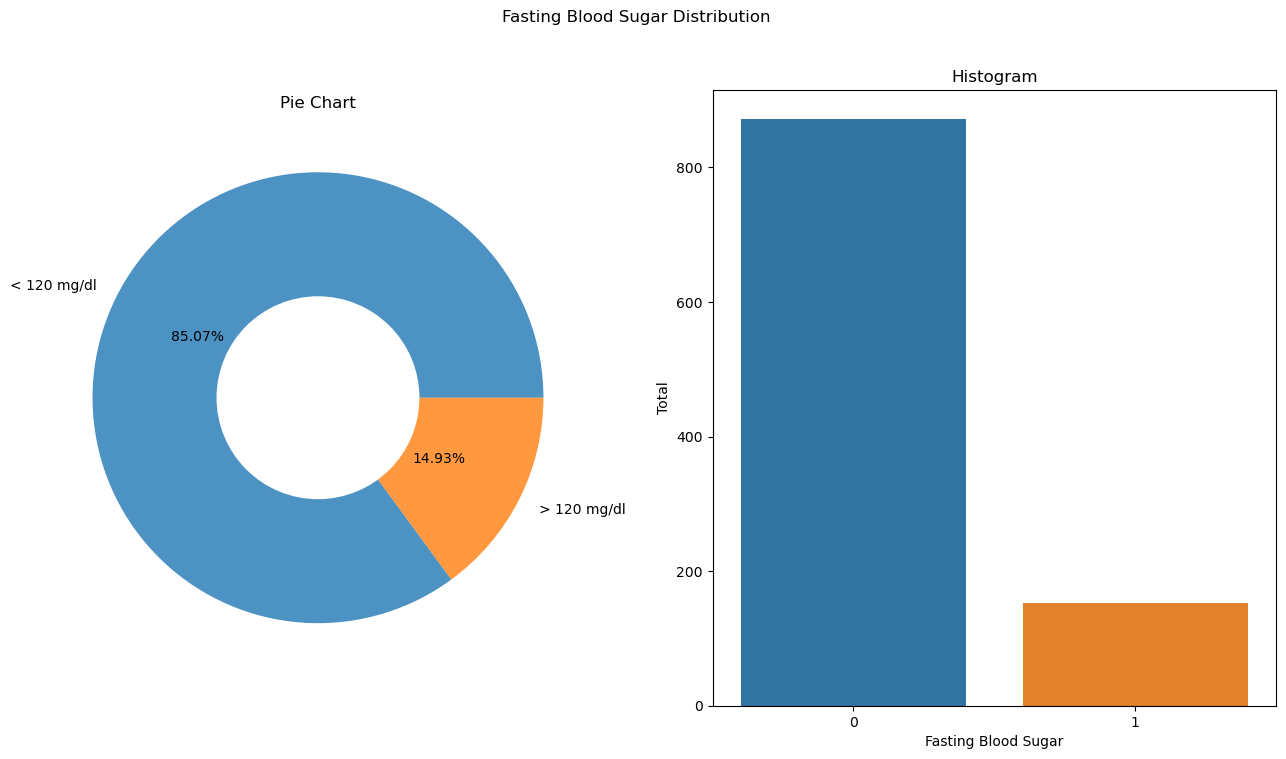

In [15]:
labels=['< 120 mg/dl', '> 120 mg/dl']
order=df['fbs'].value_counts().index

# Size for Both Figures
plt.figure(figsize= (16,8))
plt.suptitle('Fasting Blood Sugar Distribution')

# Subplot 1 Pie Chart
plt.subplot(1,2,1)
plt.title('Pie Chart')
plt.pie(df['fbs'].value_counts(),labels=labels, autopct='%.2f%%', wedgeprops=dict(alpha=0.8))
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

#Subplot 2 Histogram
countplt = plt.subplot(1,2,2)
plt.title('Histogram')
ax= sns.countplot(x='fbs',data=df,order=order)
plt.xlabel('Fasting Blood Sugar')
plt.ylabel('Total')
countplt


### Visualizzazione garfico relativo al l'elettrocardiogramma a riposo

- Normale (0): indica che l'elettrocardiogramma a riposo mostra un ritmo cardiaco normale senza anomalie rilevanti.
- Anomalia dell'onda T (1): indica la presenza di anomalie nell'onda T dell'elettrocardiogramma, che potrebbero essere associate a determinate condizioni cardiache.
- Presunta o definitiva ipertrofia ventricolare sinistra (2): indica la presenza di segni di ipertrofia ventricolare sinistra sull'elettrocardiogramma, che può essere un segno di ipertensione o altre condizioni cardiache.


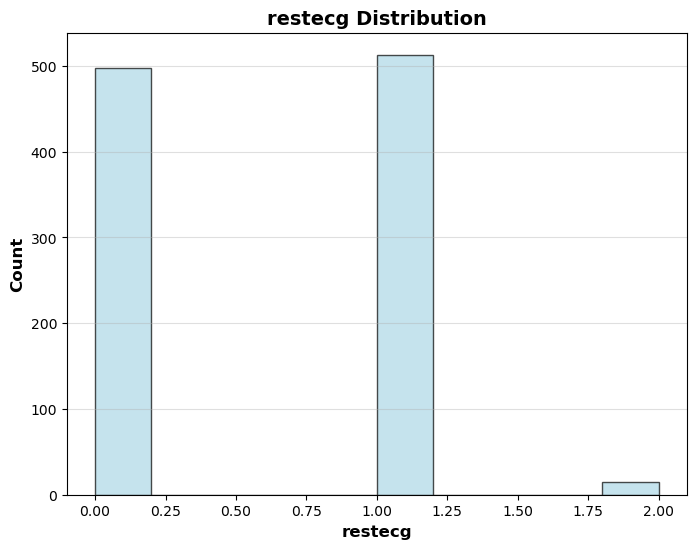

In [16]:
plt.figure(figsize=(8, 6))
plt.title('restecg Distribution', fontweight='bold', fontsize=14)
plt.hist(df['restecg'], bins=10, color='lightblue', edgecolor='black', alpha=0.7)
plt.xlabel('restecg', fontweight='bold', fontsize=12)
plt.ylabel('Count', fontweight='bold', fontsize=12)
plt.grid(axis='y', alpha=0.4)

plt.show()

## Thalach: Battito Cardiaco Massimo durante lo Stress Test


La variabile "thalach" all'interno di un dataset rappresenta il battito cardiaco massimo raggiunto durante un test di stress (esercizio) dell'ecocardiogramma. Questa variabile è espressa in battiti al minuto (bpm) e fornisce informazioni cruciali sulla funzione cardiaca e sulla capacità di risposta del cuore allo sforzo fisico.

Un valore più elevato di "thalach" indica generalmente una migliore capacità cardiaca e una maggiore efficienza del cuore nel pompare il sangue durante l'esercizio fisico. Tuttavia, è importante considerare anche altri fattori, come l'età e il livello di fitness generale del soggetto, quando si valutano i risultati del "thalach".

L'analisi della distribuzione di "thalach" nel dataset può fornire importanti insight sulla salute cardiaca dei pazienti e può essere utilizzata per valutare la loro capacità di tollerare lo sforzo fisico e il rischio di sviluppare determinate condizioni cardiovascolari. Inoltre, "thalach" può essere una variabile significativa nelle analisi predittive e nei modelli di valutazione del rischio cardiovascolare.


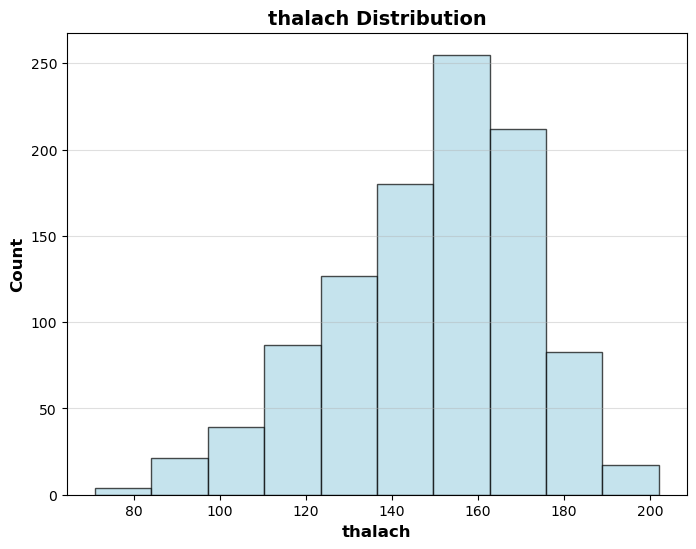

In [17]:
plt.figure(figsize=(8, 6))
plt.title('thalach Distribution', fontweight='bold', fontsize=14)
plt.hist(df['thalach'], bins=10, color='lightblue', edgecolor='black', alpha=0.7)
plt.xlabel('thalach', fontweight='bold', fontsize=12)
plt.ylabel('Count', fontweight='bold', fontsize=12)
plt.grid(axis='y', alpha=0.4)

plt.show()

## Distribuzione di exang


Questo codice genera un istogramma per visualizzare la distribuzione della variabile 'exang' nel dataset. La variabile 'exang' indica la presenza di angina indotta dall'esercizio durante il test di stress. L'istogramma mostra il numero di casi per ciascun valore di 'exang', divisi in 10 bin. I valori dell'asse x rappresentano i diversi livelli di 'exang', mentre i valori dell'asse y indicano il conteggio dei casi corrispondenti.


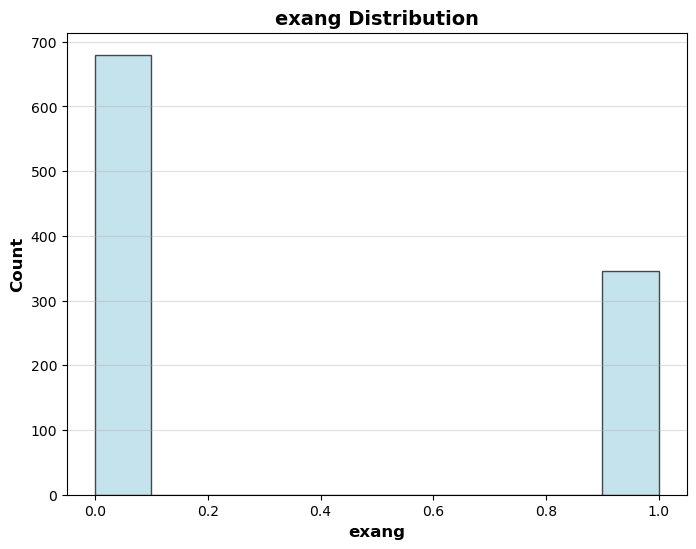

In [18]:
plt.figure(figsize=(8, 6))
plt.title('exang Distribution', fontweight='bold', fontsize=14)
plt.hist(df['exang'], bins=10, color='lightblue', edgecolor='black', alpha=0.7)
plt.xlabel('exang', fontweight='bold', fontsize=12)
plt.ylabel('Count', fontweight='bold', fontsize=12)
plt.grid(axis='y', alpha=0.4)

plt.show()

## Distribuzione di oldpeak


Questo codice genera un istogramma per visualizzare la distribuzione della variabile 'oldpeak' nel dataset. La variabile 'oldpeak' rappresenta la depressione del segmento ST indotta dall'esercizio rispetto al riposo, misurata in unità di millimetri (mm). L'istogramma mostra il numero di casi per ciascun valore di 'oldpeak', divisi in 10 bin. I valori dell'asse x rappresentano i diversi livelli di 'oldpeak', mentre i valori dell'asse y indicano il conteggio dei casi corrispondenti.


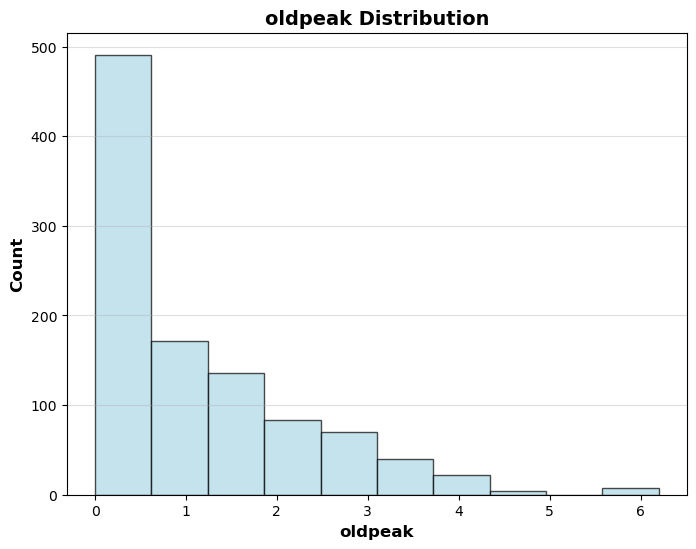

In [19]:
plt.figure(figsize=(8, 6))
plt.title('oldpeak Distribution', fontweight='bold', fontsize=14)
plt.hist(df['oldpeak'], bins=10, color='lightblue', edgecolor='black', alpha=0.7)
plt.xlabel('oldpeak', fontweight='bold', fontsize=12)
plt.ylabel('Count', fontweight='bold', fontsize=12)
plt.grid(axis='y', alpha=0.4)

plt.show()

## Distribuzione di slope


Questo codice genera un istogramma per visualizzare la distribuzione della variabile 'slope' nel dataset. La variabile 'slope' indica la pendenza del segmento ST durante l'esercizio, ed è comunemente utilizzata come indicatore di malattia coronarica. L'istogramma mostra il numero di casi per ciascun valore di 'slope', divisi in 10 bin. I valori dell'asse x rappresentano i diversi livelli di 'slope', mentre i valori dell'asse y indicano il conteggio dei casi corrispondenti.


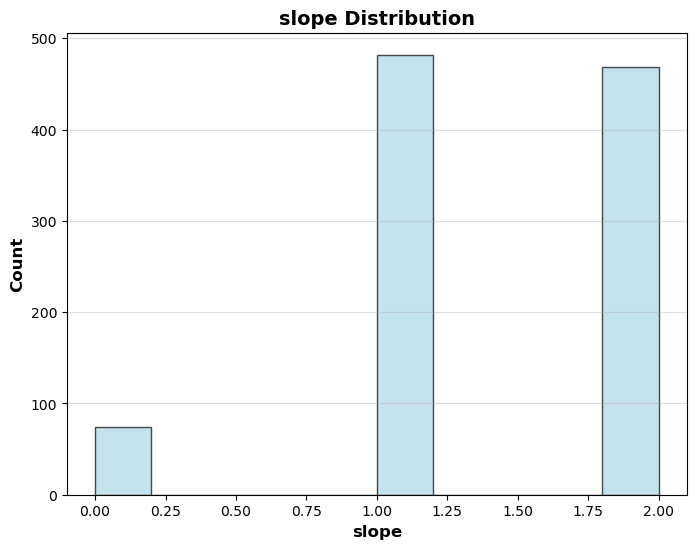

In [20]:
plt.figure(figsize=(8, 6))
plt.title('slope Distribution', fontweight='bold', fontsize=14)
plt.hist(df['slope'], bins=10, color='lightblue', edgecolor='black', alpha=0.7)
plt.xlabel('slope', fontweight='bold', fontsize=12)
plt.ylabel('Count', fontweight='bold', fontsize=12)
plt.grid(axis='y', alpha=0.4)

plt.show()

## Distribuzione di ca


Questo codice genera un istogramma per visualizzare la distribuzione della variabile 'ca' nel dataset. La variabile 'ca' indica il numero di principali vasi sanguigni colorati per fluorosopia. L'istogramma mostra il numero di casi per ciascun valore di 'ca', divisi in 10 bin. I valori dell'asse x rappresentano i diversi livelli di 'ca', mentre i valori dell'asse y indicano il conteggio dei casi corrispondenti.


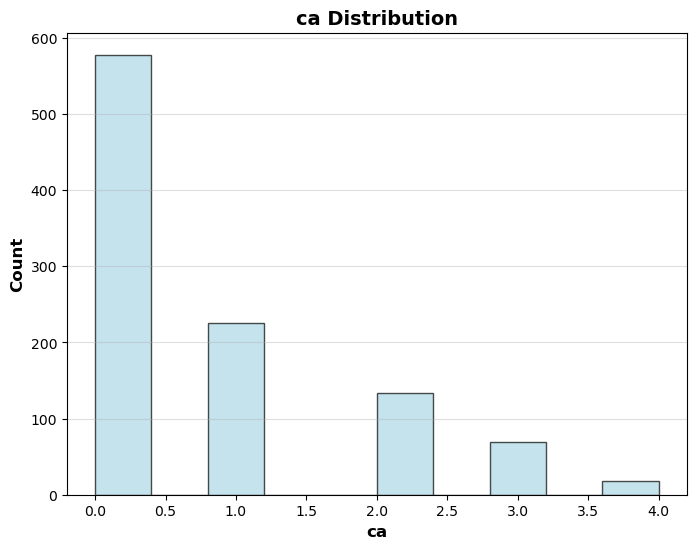

In [21]:
plt.figure(figsize=(8, 6))
plt.title('ca Distribution', fontweight='bold', fontsize=14)
plt.hist(df['ca'], bins=10, color='lightblue', edgecolor='black', alpha=0.7)
plt.xlabel('ca', fontweight='bold', fontsize=12)
plt.ylabel('Count', fontweight='bold', fontsize=12)
plt.grid(axis='y', alpha=0.4)

plt.show()

## Distribuzione del Numero di Vasi Sanguigni Principali (ca)


Questo codice genera un grafico a torta e un istogramma per visualizzare la distribuzione del numero di vasi sanguigni principali ("ca") nel dataset. Il grafico a torta mostra la percentuale di casi per ciascun valore di "ca", mentre l'istogramma mostra il conteggio totale dei casi per ogni valore di "ca". I valori dell'asse x nell'istogramma rappresentano il numero di vasi sanguigni principali, mentre i valori dell'asse y indicano il conteggio totale dei casi corrispondenti.


Text(0, 0.5, 'Total')

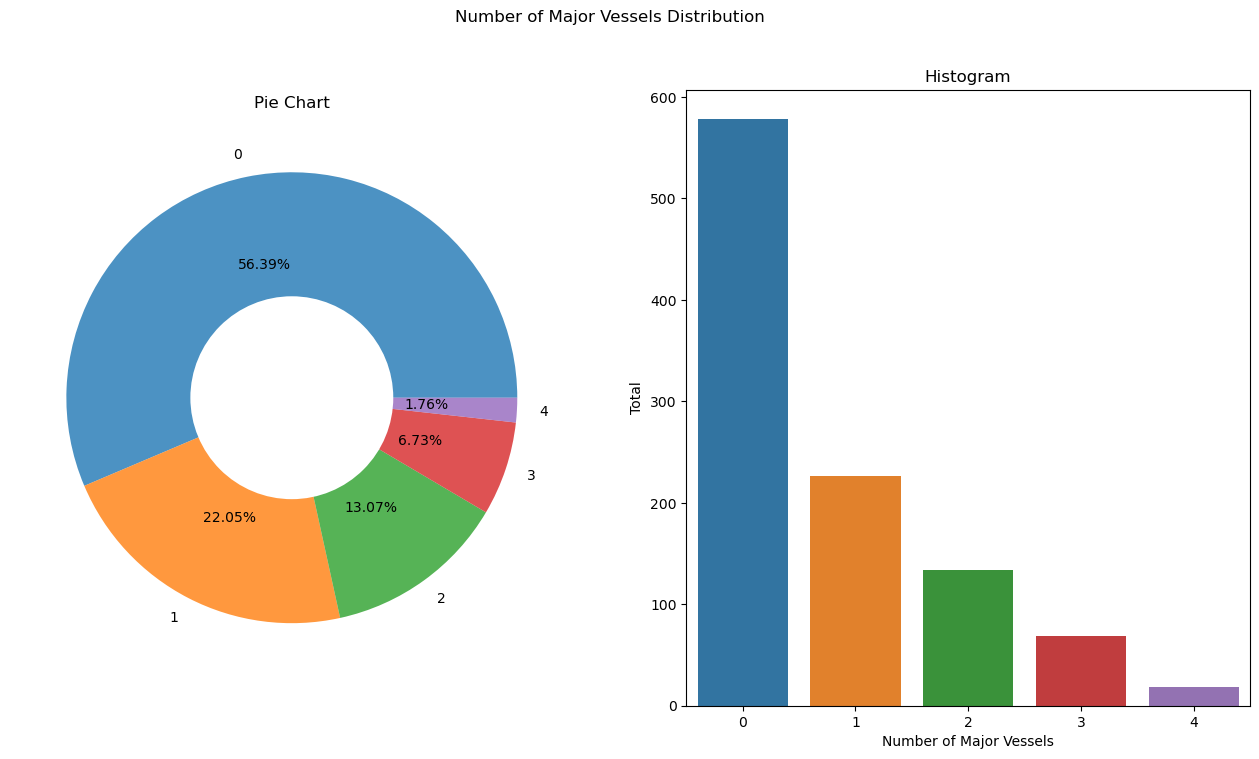

In [22]:
labels=['0', '1', '2', '3', '4']
order = df['ca'].value_counts().index

# Size for Both Figures
plt.figure(figsize=(16, 8))
plt.suptitle('Number of Major Vessels Distribution')

# Subplot 1 Pie Chart
plt.subplot(1, 2, 1)
plt.title('Pie Chart')
plt.pie(df['ca'].value_counts(), labels=labels, autopct='%.2f%%', wedgeprops=dict(alpha=0.8))
centre = plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

# Subplot 2 Histogram
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram')
ax = sns.countplot(x='ca', data=df, order=order)
plt.xlabel('Number of Major Vessels')
plt.ylabel('Total')

## Distribuzione di thal


Questo codice genera un istogramma per visualizzare la distribuzione della variabile 'thal' nel dataset. La variabile 'thal' rappresenta il tipo di difetto cardiaco. L'istogramma mostra il numero di casi per ciascun valore di 'thal', divisi in 10 bin. I valori dell'asse x rappresentano i diversi tipi di difetto cardiaco, mentre i valori dell'asse y indicano il conteggio dei casi corrispondenti.


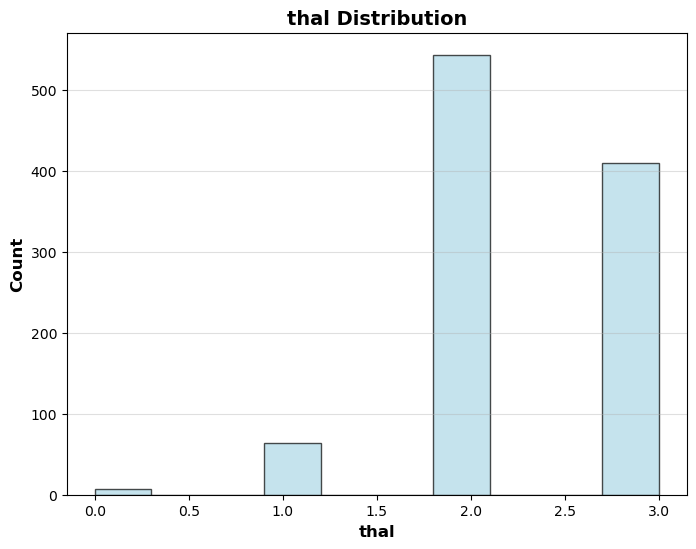

In [23]:
plt.figure(figsize=(8, 6))
plt.title('thal Distribution', fontweight='bold', fontsize=14)
plt.hist(df['thal'], bins=10, color='lightblue', edgecolor='black', alpha=0.7)
plt.xlabel('thal', fontweight='bold', fontsize=12)
plt.ylabel('Count', fontweight='bold', fontsize=12)
plt.grid(axis='y', alpha=0.4)

plt.show()


## Distribuzione delle variabili nel DataFrame


Questo codice genera un istogramma per visualizzare la distribuzione di ciascuna variabile nel DataFrame. Per ogni variabile, l'istogramma mostra la frequenza dei valori presenti. Il titolo di ciascun istogramma indica la variabile corrispondente.


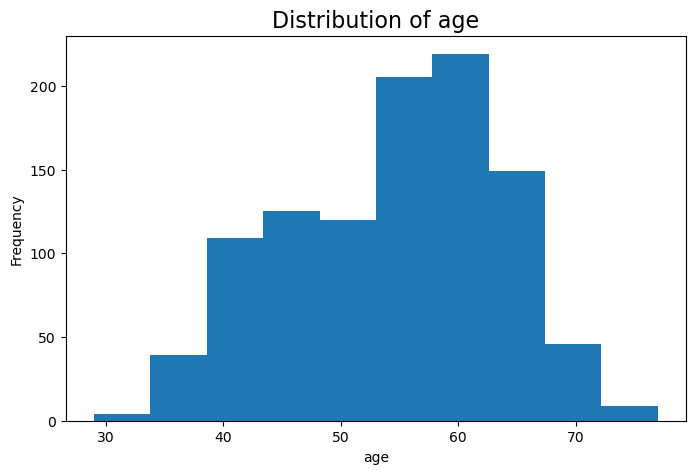

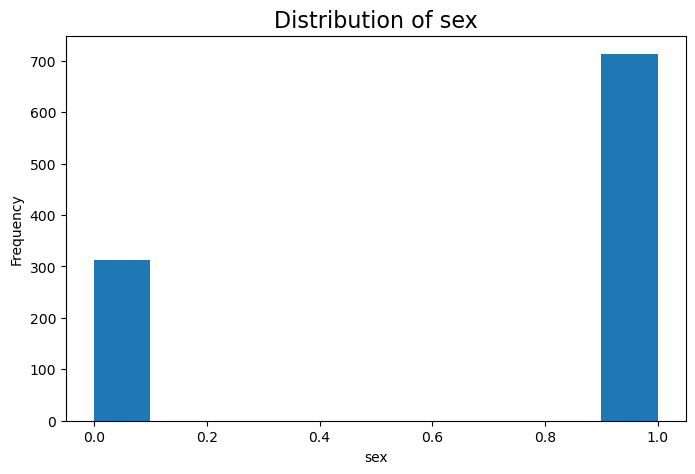

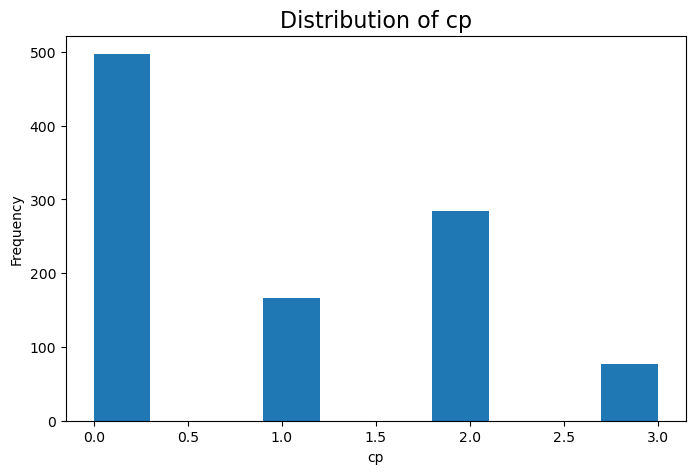

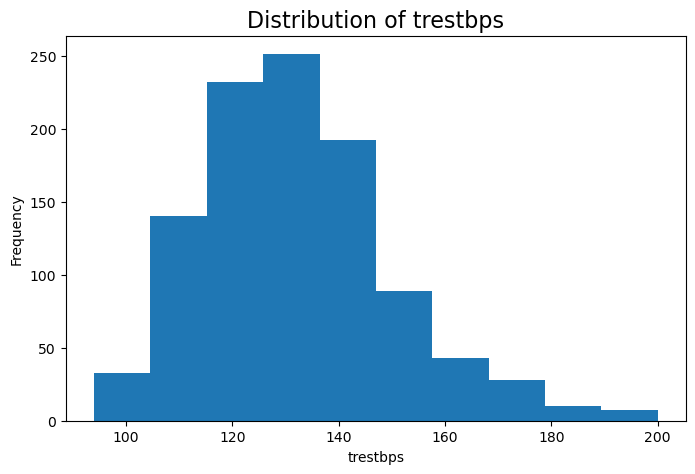

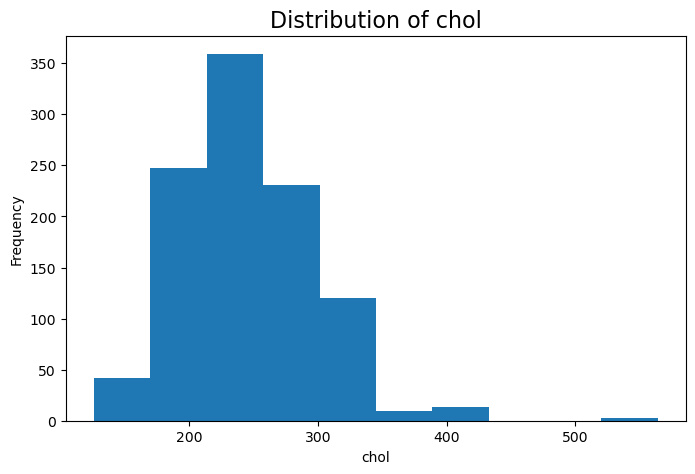

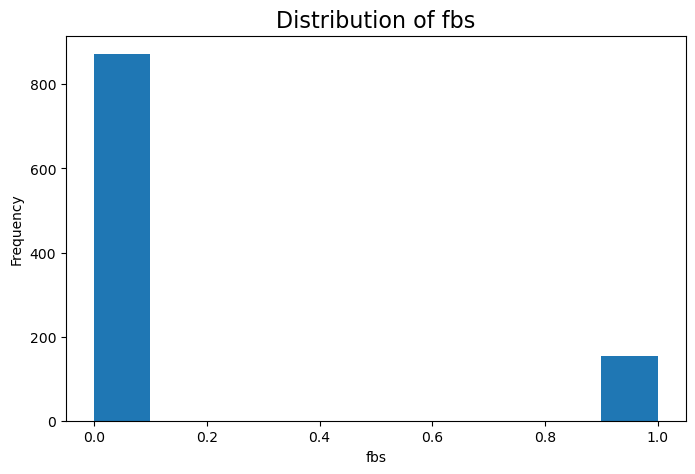

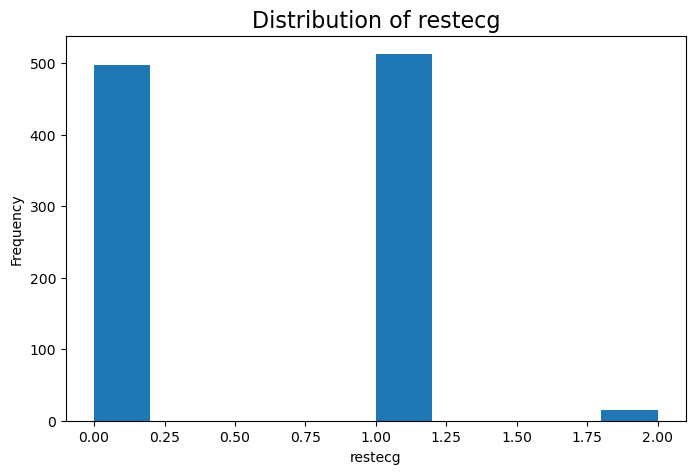

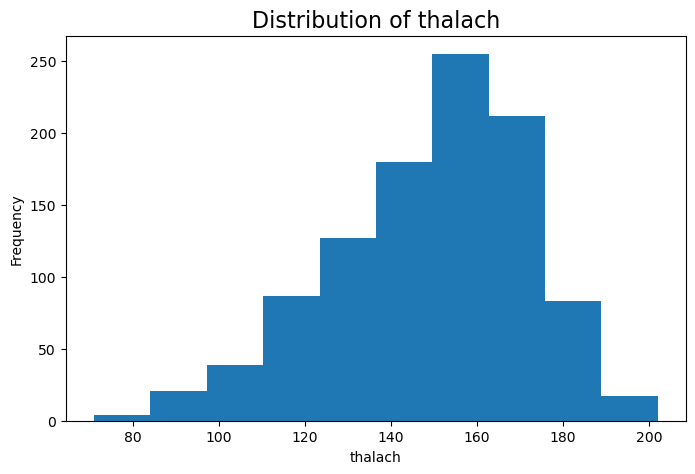

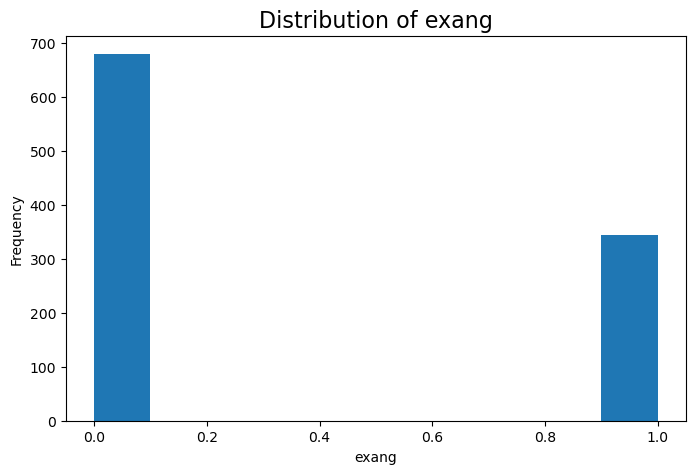

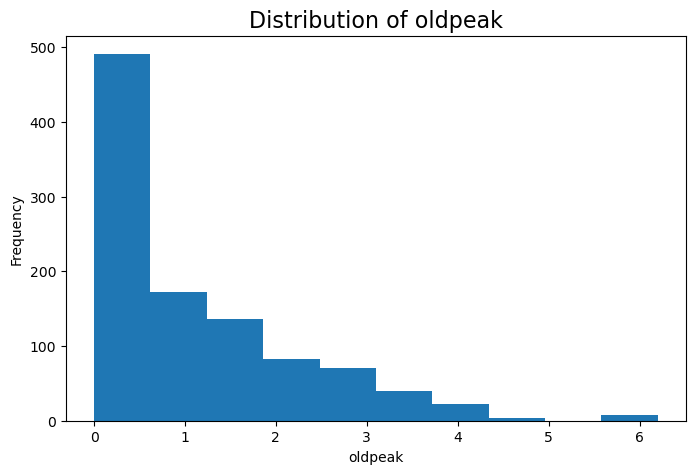

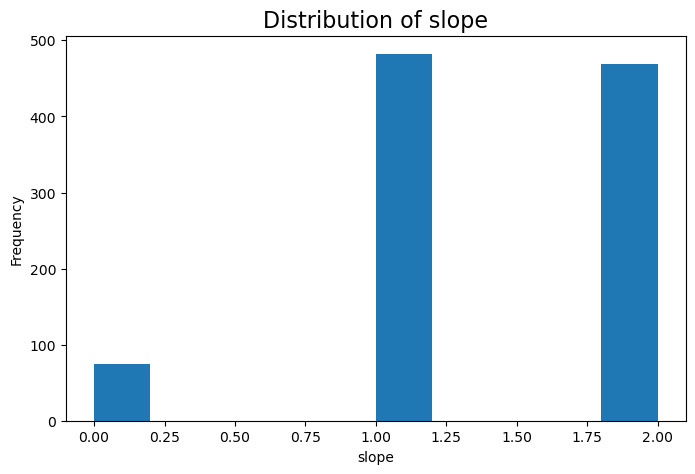

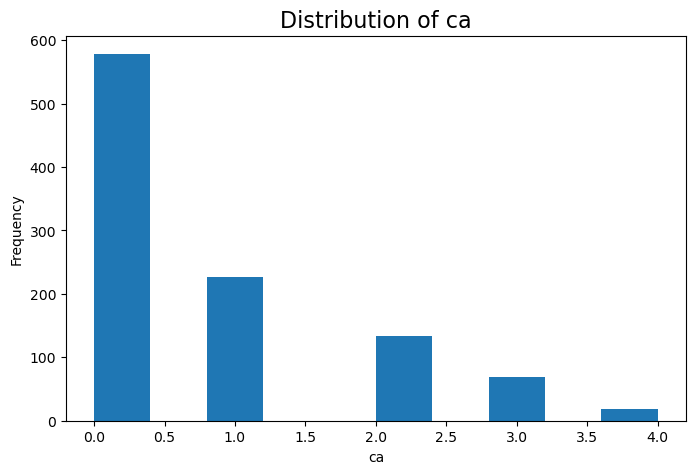

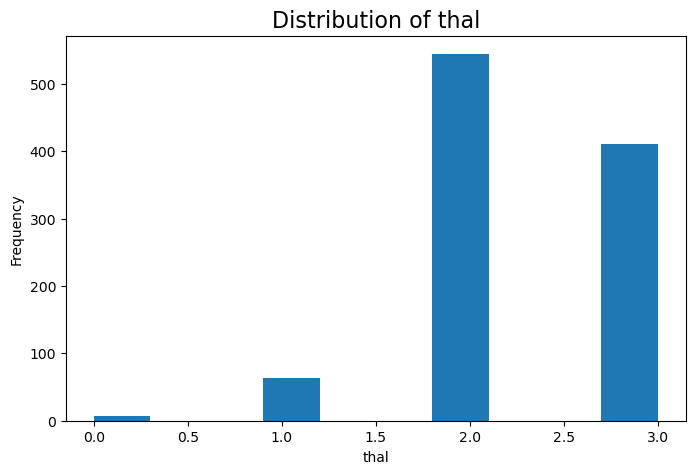

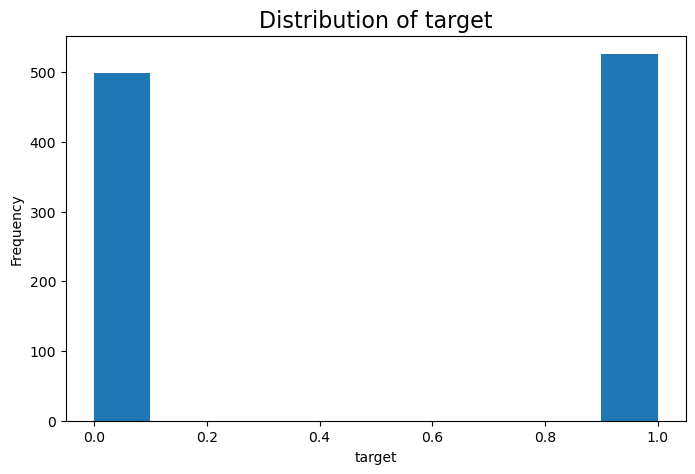

In [24]:
for column in df.columns:
    plt.figure(figsize=(8, 5))
    plt.hist(df[column])
    plt.title(f'Distribution of {column}', fontsize=16)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

## Distribuzione della Malattia Cardiaca basata sul Numero Totale di Vasi Sanguigni Principali


Questo codice genera un grafico a barre orizzontale per visualizzare la distribuzione della malattia cardiaca basata sul numero totale di vasi sanguigni principali nel dataset. La barra orizzontale rappresenta il numero totale di casi per ciascun valore del numero di vasi sanguigni principali, suddivisi tra quelli con malattia cardiaca e quelli senza. Il testo all'interno di ciascuna barra indica il numero totale di casi. Il titolo del grafico fornisce una sintesi dei risultati, evidenziando che i pazienti con 0 e 4 vasi sanguigni principali tendono ad avere malattie cardiache, mentre quelli con un numero di vasi sanguigni da 1 a 3 tendono a non averle.


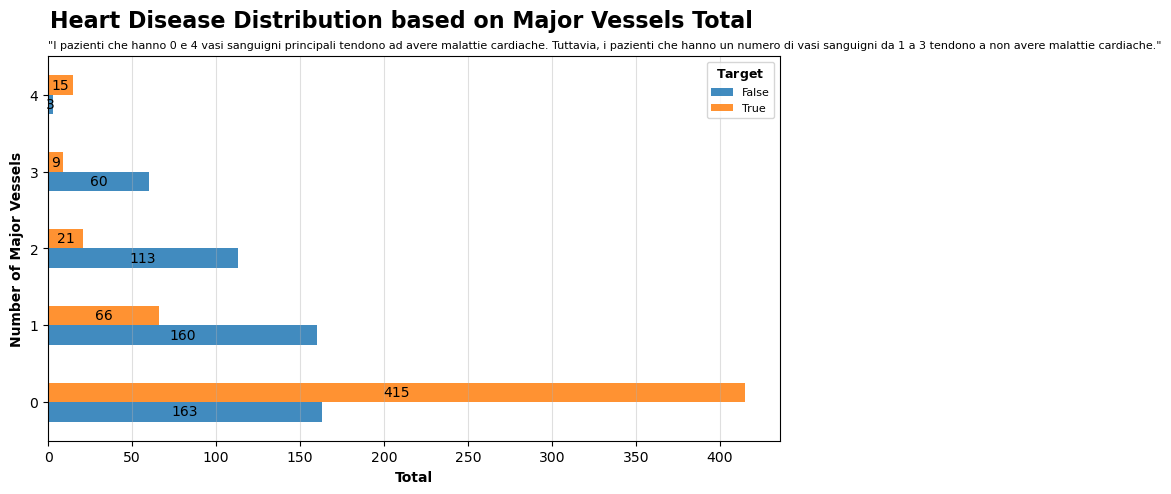

In [25]:
labels = ['False', 'True']
ax = pd.crosstab(df.ca, df.target).plot(kind='barh', figsize=(8, 5), alpha=0.85)
for rect in ax.patches:
    width, height = rect.get_width(), rect.get_height()
    x, y = rect.get_xy()
    ax.text(x+width/2, y+height/2, '{:.0f}'.format(width),
             horizontalalignment='center', verticalalignment='center')

plt.suptitle('Heart Disease Distribution based on Major Vessels Total',
             fontweight='heavy', x=0.069, y=0.98, ha='left', fontsize='16',
             fontfamily='sans-serif')
plt.title('"I pazienti che hanno 0 e 4 vasi sanguigni principali tendono ad avere malattie cardiache. Tuttavia, i pazienti che hanno un numero di vasi sanguigni da 1 a 3 tendono a non avere malattie cardiache."',
          fontsize='8', fontfamily='sans-serif', loc='left')
plt.tight_layout(rect=[0, 0.04, 1, 1.025])
plt.xlabel('Total', fontfamily='sans-serif', fontweight='bold')
plt.ylabel('Number of Major Vessels', fontfamily='sans-serif', fontweight='bold')
plt.yticks(rotation=0)
plt.grid(axis='x', alpha=0.4)
plt.grid(axis='y', alpha=0)
plt.legend(labels=labels, title='$\mathbf{Target}$', fontsize='8', frameon=True,
           title_fontsize='9', loc='upper right')
plt.show ()


## Distribuzione delle Malattie Cardiache


Questo codice genera un grafico a torta e un istogramma per visualizzare la distribuzione delle malattie cardiache nel dataset. Il grafico a torta mostra la percentuale di casi con e senza malattia cardiaca, mentre l'istogramma mostra il conteggio totale dei casi per ciascuno stato di malattia cardiaca. Il titolo del grafico fornisce una sintesi dei risultati, evidenziando la distribuzione delle malattie cardiache nel dataset.


<Axes: title={'center': 'Histogram'}, xlabel='Heart Disease Status', ylabel='Total'>

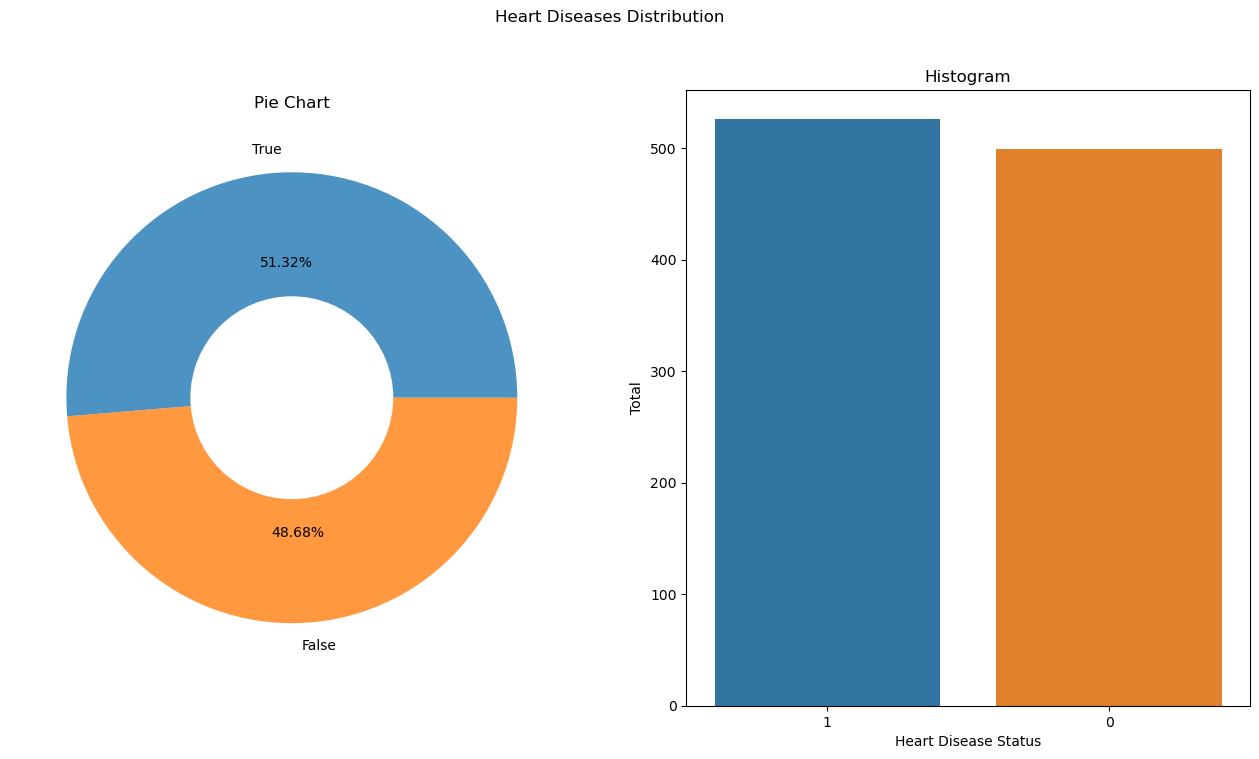

In [26]:
labels=['True', 'False']
order=df['target'].value_counts().index

# Size for Both Figures
plt.figure(figsize= (16,8))
plt.suptitle('Heart Diseases Distribution')

# Subplot 1 Pie Chart
plt.subplot(1,2,1)
plt.title('Pie Chart')
plt.pie(df['target'].value_counts(),labels=labels, autopct='%.2f%%', wedgeprops=dict(alpha=0.8))
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

#Subplot 2 Histogram
countplt = plt.subplot(1,2,2)
plt.title('Histogram')
ax= sns.countplot(x='target',data=df,order=order)
plt.xlabel('Heart Disease Status')
plt.ylabel('Total')
countplt


## Calcolo delle persone che hanno riscontarto una malattia per ogni sesso

In [27]:
gender_counts = df.groupby('sex')['target'].sum().reset_index(name='heart_attack_counts')
gender_counts

,sex,heart_attack_counts
0,0,226
1,1,300


## Visualizzazione grafico a barre

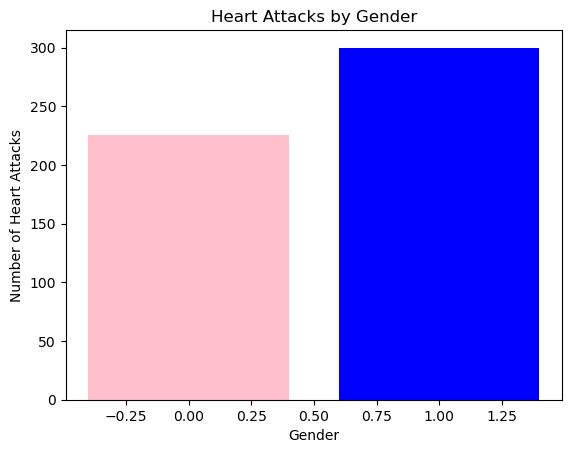

In [28]:
plt.bar(gender_counts['sex'], gender_counts['heart_attack_counts'], color=['pink', 'blue'])
plt.xlabel('Gender')
plt.ylabel('Number of Heart Attacks')
plt.title('Heart Attacks by Gender')
plt.show()


# Modifica del Dataset

## Calcolo delle righe duplicate

In [29]:
df.duplicated().sum()

723

## Eliminazione delle righe duplicate

In [30]:
df1 = df.drop_duplicates()
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


## Calcolo dei Missing values

In [31]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Outliers

## Creazione di un grafico a box plot per la visualizzazione degli outliers presenti

<Axes: >

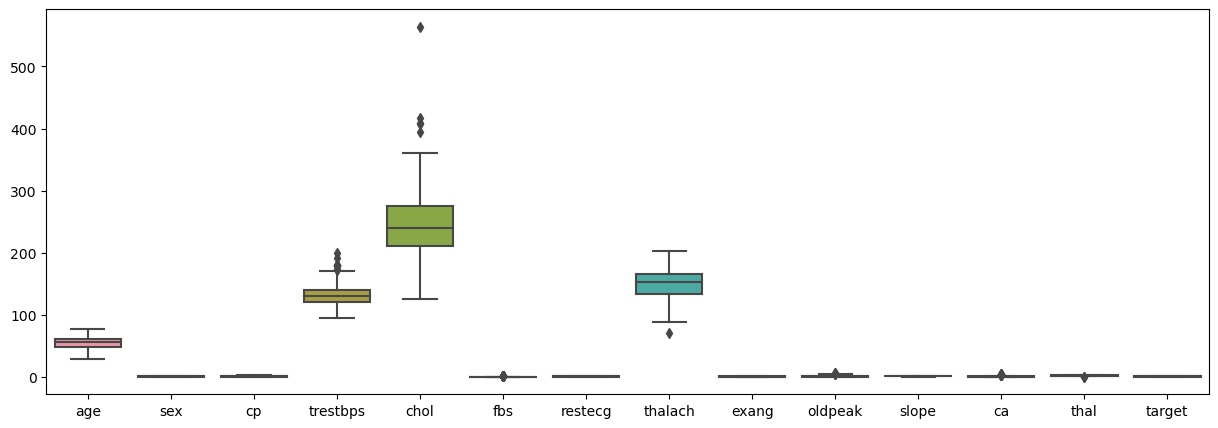

In [32]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df1)

## Calcolo del Quantile al 99% per la Pressione Sanguigna a Riposo (trestbps)


In [33]:
df1['trestbps'].quantile(0.99)

180.0

## Creazione nuovo DataSet dopo la rimozione degli outliers presenti nella colonna trestbps

In [34]:
hd = df1[df1['trestbps'] < df['trestbps'].quantile(0.99)]

## Visualizzazione del nuovo DataSet

<Axes: >

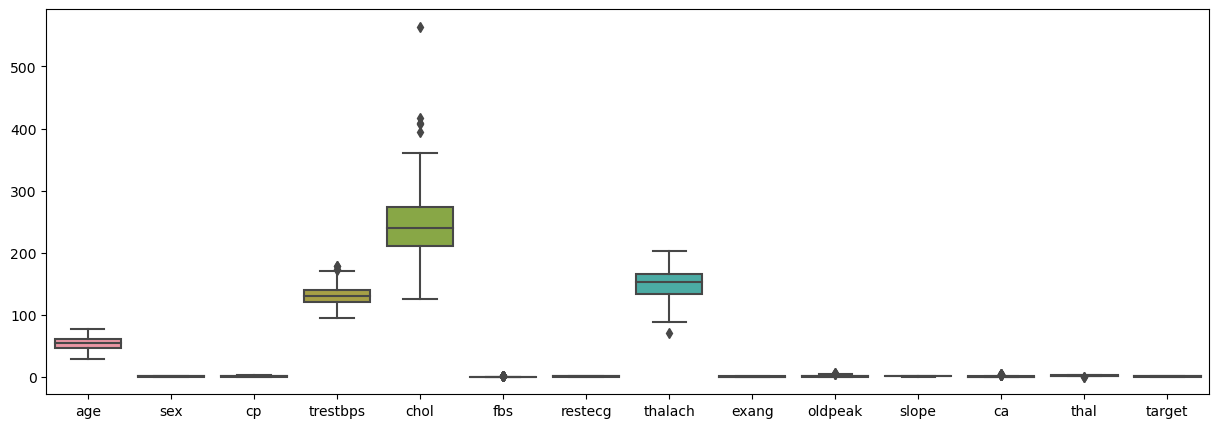

In [35]:
plt.figure(figsize=(15,5))
sns.boxplot(data=hd)

## Calcolo del Quantile al 98% per il Colesterolo (chol)


In [36]:
hd['chol'].quantile(0.98)

354.4799999999999

## Rimozione dei Valori Estremi di Colesterolo (chol) con il Quantile al 98%

In [37]:
hd1 = hd[hd['chol'] < hd['chol'].quantile(0.98)]

## Visulaizzazione DAtaSet aggiornato

<Axes: >

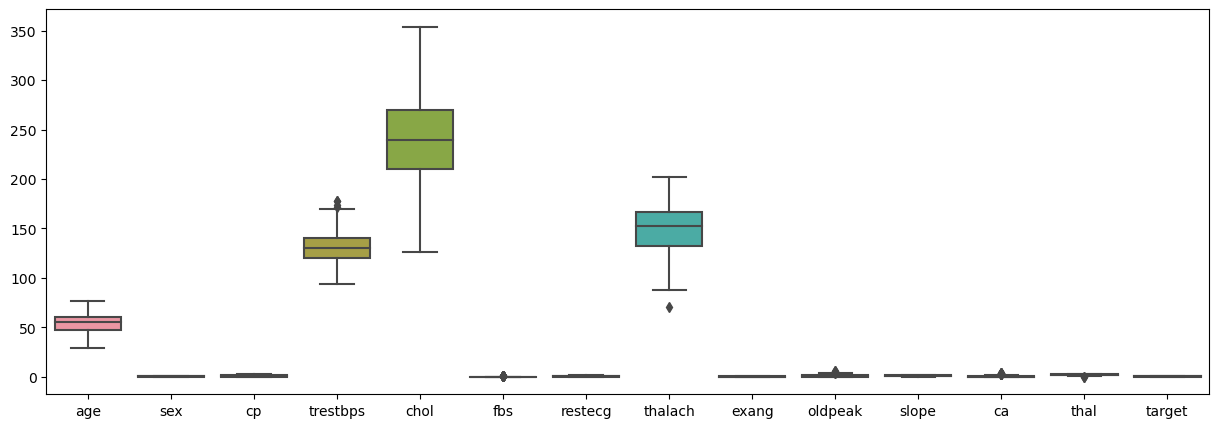

In [38]:
plt.figure(figsize=(15,5))
sns.boxplot(data=hd1)

## Calcolo del Quantile al 0.5% per la Frequenza Cardiaca Massima (thalach)


In [39]:
hd1['thalach'].quantile(0.005)

88.9

## Rimozione degli Outliers della Frequenza Cardiaca Massima (thalach) con il Quantile al 0.5%


In [40]:
hd2 = hd1[hd1['thalach'] > hd1['thalach'].quantile(0.005)]

## Visualizzazione DataSet aggiornato

<Axes: >

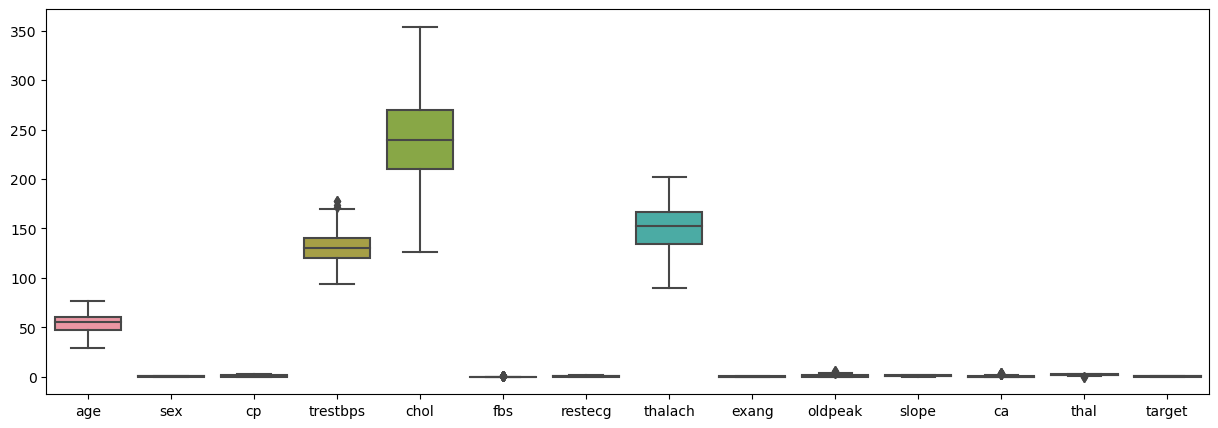

In [41]:
plt.figure(figsize=(15,5))
sns.boxplot(data=hd2)

## Visualizzazione nuove informazioni sul DataSet aggiornato

In [42]:
hd2.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000
mean,54.103806,0.698962,0.975779,130.453287,241.813149,0.145329,0.532872,149.941176,0.321799,1.015571,1.404844,0.716263,2.304498,0.550173
std,9.062454,0.459505,1.035533,16.137174,44.326594,0.353043,0.520209,22.378685,0.467977,1.147279,0.616985,1.008185,0.615777,0.498339
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,210.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,153.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,270.000000,0.000000,1.000000,167.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,178.000000,354.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [43]:
hd2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


# Scaling ed Encoding

## Analisi e scalatura dei dati cardiaci

Questo codice carica un dataset contenente dati relativi a condizioni cardiache da un file CSV e ne stampa le prime righe. Successivamente, utilizza lo StandardScaler di scikit-learn per normalizzare le caratteristiche del dataset, ad eccezione della colonna 'target'. Il dataset normalizzato viene quindi trasformato in un DataFrame per ulteriori analisi. Il DataFrame risultante include le caratteristiche scalate insieme alla colonna 'target'. La stampa delle prime righe di questo DataFrame offre una panoramica delle caratteristiche normalizzate e del target associato.

In [44]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Caricamento del dataset
data = pd.read_csv('heart.csv')

# Stampa delle prime righe del dataset
print(data.head())

# Creazione degli scaler e assegnazione dei dati
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop('target', axis=1))

# Creazione del dataframe con i dati scalati e il target
hd2_standardized = pd.DataFrame(data_scaled, columns=data.columns[:-1])
hd2_standardized['target'] = data['target']

# Stampa del dataframe con i dati scalati
print(hd2_standardized.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
        age       sex        cp  trestbps      chol       fbs   restecg  \
0 -0.268437  0.661504 -0.915755 -0.377636 -0.659332 -0.418878  0.891255   
1 -0.158157  0.661504 -0.915755  0.479107 -0.833861  2.387330 -1.004049   
2  1.716595  0.661504 -0.915755  0.764688 -1.396233 -0.418878  0.891255   
3  0.724079  0.661504 -0.915755  0.936037 -0.833861 -0.418878  0.891255   
4  0.8

## Relazione tra le caratteristiche scalate e il target nei dati cardiaci

Le caratteristiche del dataset vengono normalizzate utilizzando lo StandardScaler di scikit-learn e quindi vengono visualizzate in un grafico a dispersione rispetto al target. Ogni punto sul grafico rappresenta un'osservazione nel dataset, dove le caratteristiche normalizzate sono sull'asse x e il target è sull'asse y. Il grafico consente di esaminare visivamente la relazione tra le caratteristiche scalate e il target e può aiutare a individuare eventuali pattern o correlazioni tra di essi. La legenda fornisce i nomi delle caratteristiche rappresentate.

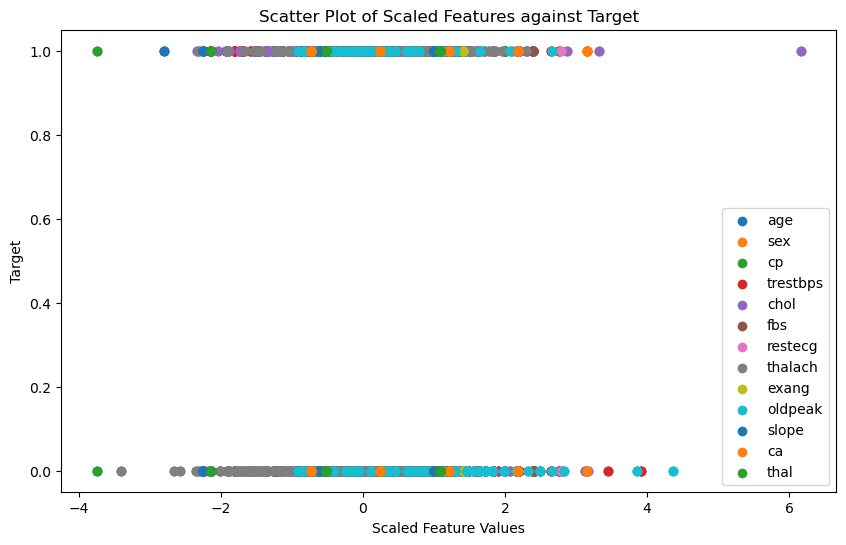

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Caricamento del dataset
data = pd.read_csv('heart.csv')

# Creazione degli scaler e assegnazione dei dati
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop('target', axis=1))

# Creazione del dataframe con i dati scalati e il target
hd2_standardized = pd.DataFrame(data_scaled, columns=data.columns[:-1])
hd2_standardized['target'] = data['target']

# Grafico a dispersione
plt.figure(figsize=(10, 6))
for col in hd2_standardized.columns[:-1]:
    plt.scatter(hd2_standardized[col], hd2_standardized['target'], label=col)

plt.xlabel('Scaled Feature Values')
plt.ylabel('Target')
plt.title('Scatter Plot of Scaled Features against Target')
plt.legend()
plt.show()



## Codifica one-hot delle caratteristiche categoriche nei dati cardiaci

Questo codice utilizza l'encoder one-hot di scikit-learn per trasformare le caratteristiche categoriche selezionate in un formato numerico, creando colonne binarie per ciascuna categoria. Le colonne selezionate per la codifica includono 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca' e 'thal'. Una volta codificate, le colonne trasformate vengono inserite in un DataFrame denominato encoded_df. Il nome di ciascuna colonna codificata viene ottenuto utilizzando il metodo get_feature_names_out dell'encoder one-hot, e queste colonne vengono quindi aggiunte al DataFrame encoded_df. Infine, la colonna del target viene aggiunta al DataFrame encoded_df, che viene stampato per visualizzare i dati codificati insieme al target. Questo processo è utile per preparare i dati categorici per l'analisi e il modello predittivo.

In [4]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Creazione dell'encoder
encoder = OneHotEncoder(sparse=False)

# Seleziono le colonne da includere
columns_to_encode = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# Trasformo le colonne selezionate
encoded_columns = encoder.fit_transform(hd2_standardized[columns_to_encode])

# Creo un DataFrame con le colonne trasformate
encoded_df = pd.DataFrame(encoded_columns)

# Aggiungo i nomi delle colonne al DataFrame
encoded_df.columns = encoder.get_feature_names_out(input_features=columns_to_encode)

# Aggiungo il target al DataFrame
encoded_df['target'] = hd2_standardized['target']

# Stampa del dataframe con i dati encoded
print(encoded_df.head())


   age_-2.8048664310230067  age_-2.2534686381962743  age_-2.143189079630928  \
0                      0.0                      0.0                     0.0   
1                      0.0                      0.0                     0.0   
2                      0.0                      0.0                     0.0   
3                      0.0                      0.0                     0.0   
4                      0.0                      0.0                     0.0   

   age_-1.922629962500235  age_-1.8123504039348886  age_-1.7020708453695423  \
0                     0.0                      0.0                      0.0   
1                     0.0                      0.0                      0.0   
2                     0.0                      0.0                      0.0   
3                     0.0                      0.0                      0.0   
4                     0.0                      0.0                      0.0   

   age_-1.591791286804196  age_-1.4815117282388495

C:\Users\Messoanuovo.it\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Divisione del dataset codificato in set di addestramento e test

Questo codice assegna i dati codificati e il target a variabili separate X e y, rispettivamente. Successivamente, il dataset viene diviso in set di addestramento e test utilizzando la funzione train_test_split di scikit-learn. Il parametro test_size è impostato al 20% del dataset totale, indicando che il 20% dei dati verrà utilizzato come set di test e il restante 80% come set di addestramento. Il parametro random_state viene impostato su 42 per garantire la riproducibilità dei risultati. Infine, le dimensioni dei set di addestramento e test vengono stampate per fornire un'indicazione del numero di osservazioni in ciascuno dei due set. Questo processo è fondamentale nella preparazione dei dati per la modellazione, in quanto consente di addestrare il modello su una parte del dataset e di valutarne le prestazioni su un'altra parte separata.






In [12]:
# Divisione del dataset in features (X) e target (y)
X = data.drop('target', axis=1)  # Assumi che 'target' sia il nome della colonna target
y = data['target']

# Split del dataset in set di addestramento e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Stampa delle dimensioni dei set di addestramento e test
print("Dimensioni del set di addestramento (features):", X_train.shape)
print("Dimensioni del set di addestramento (target):", y_train.shape)
print("Dimensioni del set di test (features):", X_test.shape)
print("Dimensioni del set di test (target):", y_test.shape)

Dimensioni del set di addestramento (features): (820, 13)
Dimensioni del set di addestramento (target): (820,)
Dimensioni del set di test (features): (205, 13)
Dimensioni del set di test (target): (205,)


## Visualizzazione tramite grafico a torta delle classi dopo la divisione

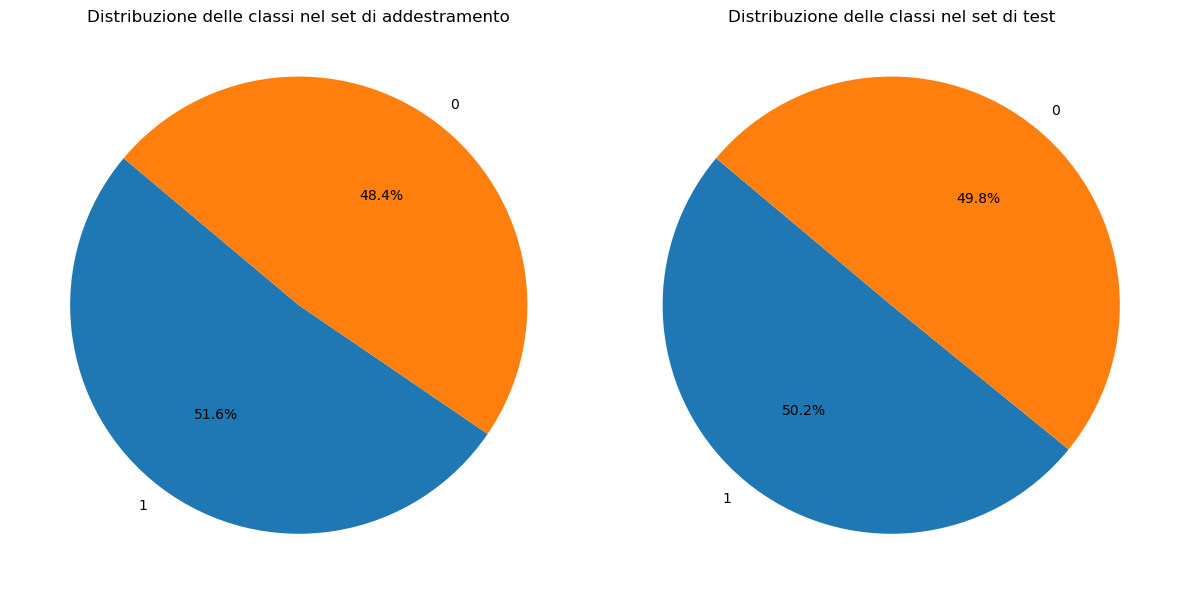

In [14]:
train_class_distribution = y_train.value_counts()

# Calcolo della distribuzione delle classi nel target nel set di test
test_class_distribution = y_test.value_counts()

# Creazione della figura con due subplot
plt.figure(figsize=(12, 6))

# Primo subplot per il set di addestramento
plt.subplot(1, 2, 1)
plt.pie(train_class_distribution, labels=train_class_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuzione delle classi nel set di addestramento')
plt.axis('equal')

# Secondo subplot per il set di test
plt.subplot(1, 2, 2)
plt.pie(test_class_distribution, labels=test_class_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuzione delle classi nel set di test')
plt.axis('equal')

plt.tight_layout()  # Per evitare sovrapposizioni
plt.show()